In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')



In [3]:
df = pd.read_csv('../data/processed/final_model_data.csv')

In [4]:
y = df['Value']

In [9]:
feature_to_use = ['year', 
                  'latitude', 
                  'longitude', 
                  'T2M_mean', 
                  'T2M_max', 
                  'T2M_min', 
                  'T2M_std', 
                  'PRECTOTCORR_sum', 
                  'PRECTOTCORR_max', 
                  'extreme_heat_days']

In [10]:
X = df[feature_to_use]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [12]:
df_train = X_train.copy()
df_train['Value'] = y_train

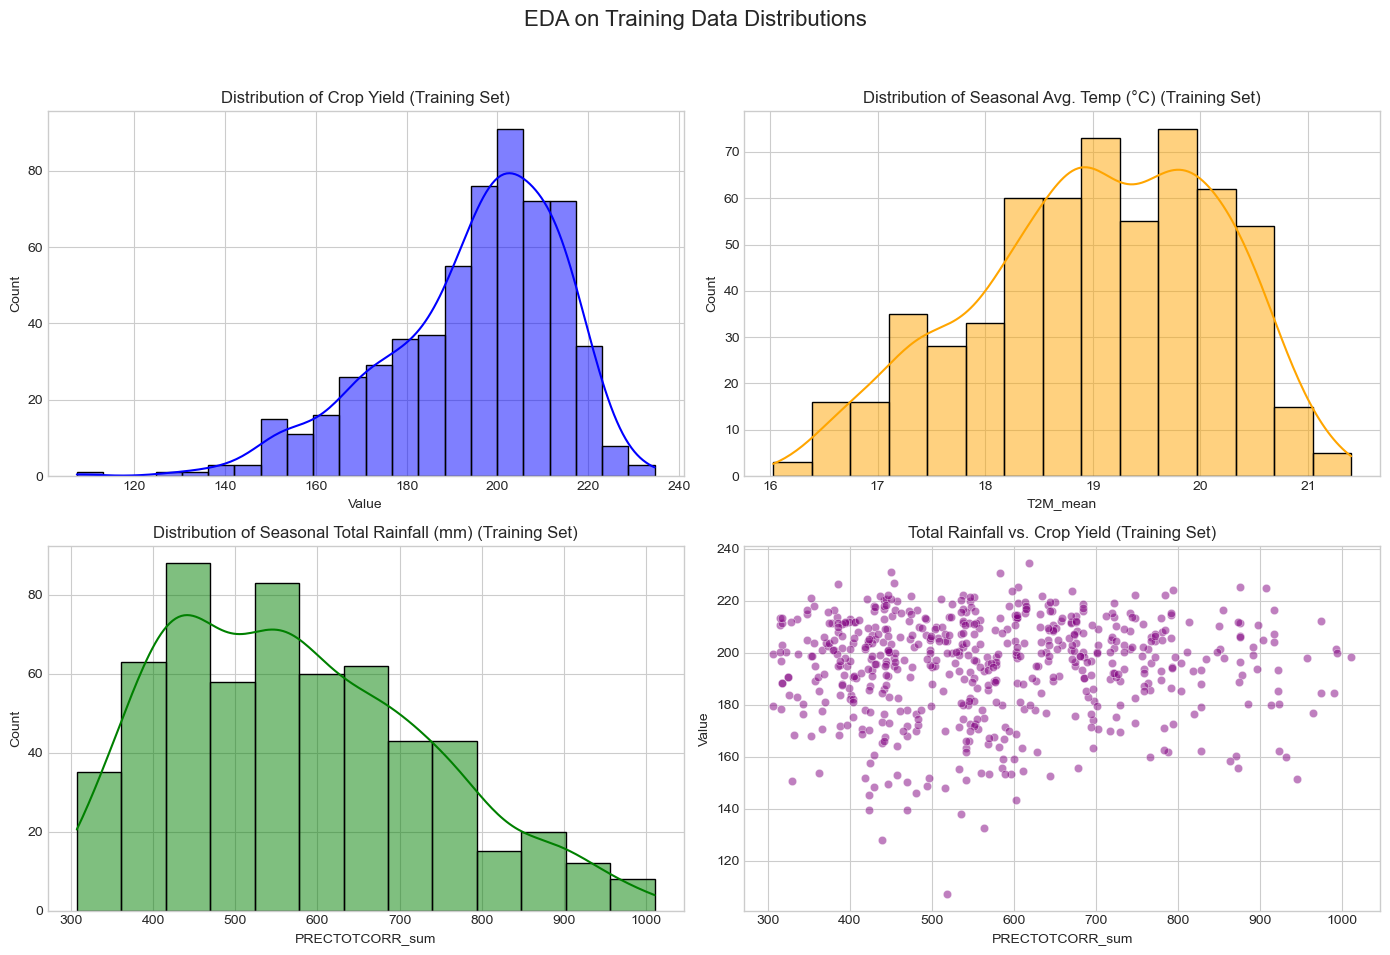

In [13]:
# Univaraite Analysis 
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('EDA on Training Data Distributions', fontsize=16)
sns.histplot(df_train['Value'], kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Distribution of Crop Yield (Training Set)')
sns.histplot(df_train['T2M_mean'], kde=True, ax=axes[0, 1], color='orange')
axes[0, 1].set_title('Distribution of Seasonal Avg. Temp (°C) (Training Set)')
sns.histplot(df_train['PRECTOTCORR_sum'], kde=True, ax=axes[1, 0], color='green')
axes[1, 0].set_title('Distribution of Seasonal Total Rainfall (mm) (Training Set)')
sns.scatterplot(data=df_train, x='PRECTOTCORR_sum', y='Value', ax=axes[1, 1], alpha=0.5, color='purple')
axes[1, 1].set_title('Total Rainfall vs. Crop Yield (Training Set)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



--- Analyzing Feature Correlations on the Training Set ---


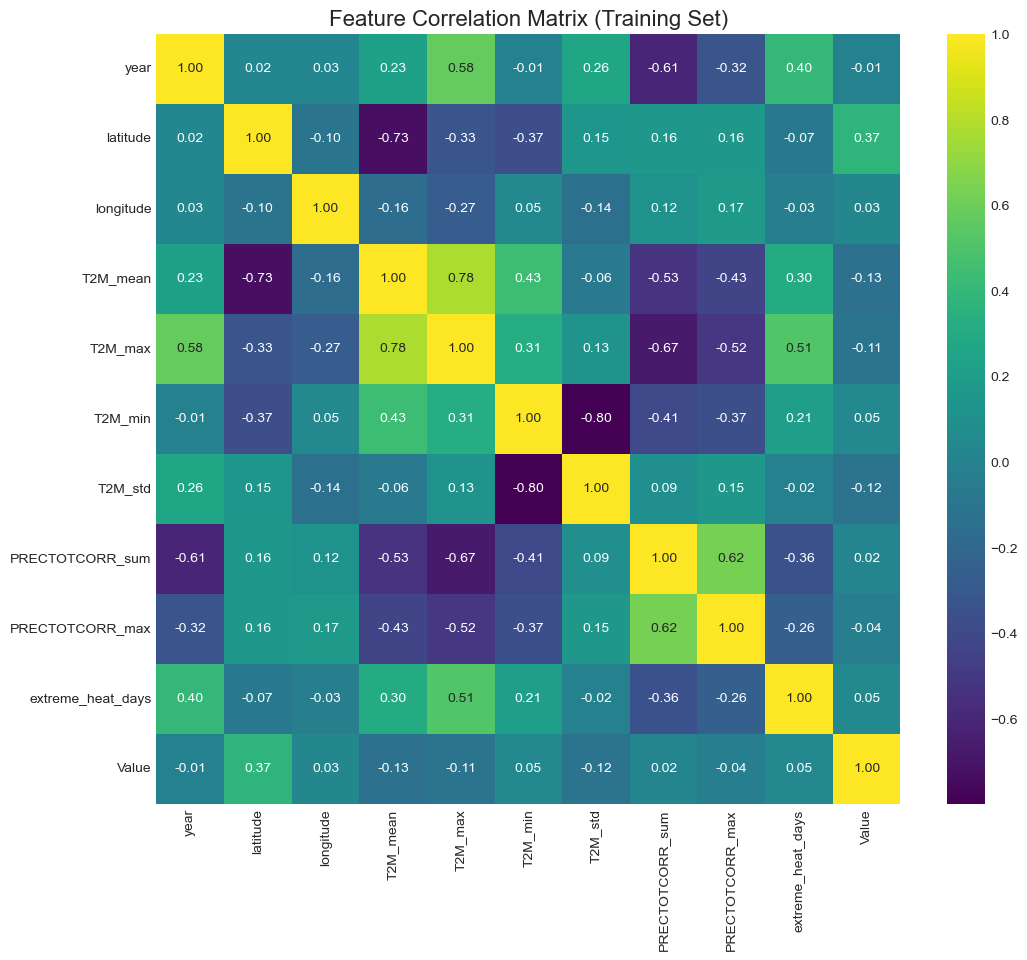

In [14]:
# Correlation 
print("\n--- Analyzing Feature Correlations on the Training Set ---")
corr_matrix = df_train.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Feature Correlation Matrix (Training Set)', fontsize=16)
plt.show()